# SD-TSIA204 - Linear Statistics

# BENEDETTI DA ROSA Giovanni


In [106]:
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA

In [107]:
# Change here using YOUR own first and last names
fn1 = "Giovanni"
ln1 = "Benedetti"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
filename

'sd-tsia204_lab2_benedetti_giovanni.ipynb'

Question 1 - For the first question, we load a standard dataset from sklearn.datasets named
fetch_california_housing. This dataset has only p = 8 variables.

(a) Estimate the coefficients with the expression of the normal equaitons seen in class. Code two
functions to compute the MSE and the R2 coefficient and compare them with the version of
sklearn for the train and the test sets.


To estimate $\hat{\theta}$, we can use the normal equation

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$


In [108]:
# Fetch the dataset
data = fetch_california_housing()

X = data['data']  # features
y = data['target']  # target

print(data['DESCR'])  # prints a description of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [109]:

# Add a column of ones to the feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


# Calculate the normal equation
theta = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

# Print the regression coefficients
print("Regression Coefficients:")
for i, coef in enumerate(theta):
    print(f"Theta_{i}: {coef}")

Regression Coefficients:
Theta_0: -36.609593779152696
Theta_1: 0.4390910418766773
Theta_2: 0.009598646648267463
Theta_3: -0.10331117273687328
Theta_4: 0.6167301519267155
Theta_5: -7.632751973812507e-06
Theta_6: -0.004488382564143566
Theta_7: -0.41735328391365184
Theta_8: -0.43061446209377235


To mesure the quality of our model, we can compute $R^2$ score the mean squared error(MSE):

$$
MSE = \frac{1}{n} \sum_i^n (y_i - \hat{y_i})^2
$$

$$
R^2 = 1 - \frac{\sum_i^n (y_i - \hat{y_i})^2}{\sum_i^n (y_i - \bar{y_i})^2}
$$


In [110]:
y_pred = X_test @ theta


def r_squared(y_true, y_pred):
    
    ss_res = np.sum((y_true - y_pred) ** 2)

    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2



def compute_mean_squared_error(y_true, y_pred):

    return np.mean((y_true - y_pred) ** 2)

print(f"MSE: {compute_mean_squared_error(y_test, y_pred)}")
print(f"MSE Sklearn: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Sklearn: {r2_score(y_test, y_pred)}")
print(f"R2: {r_squared(y_test, y_pred)}")

MSE: 0.5404128061715282
MSE Sklearn: 0.5404128061715282
R2 Sklearn: 0.5911695436405795
R2: 0.5911695436405795


Question 1

(b) Finally, give the confidence intervals at level 99% for all the coefficients coding the expression
for the CI seen in session 3.

In order to do this, we consider a gaussian model:
$$T_j=\frac{\widehat{\theta}_j-\theta_j^*}{\widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \sim \mathcal{T}_{n-p-1}$$

$t_{1-\alpha / 2}$ a quantile of order $1-\alpha / 2$ of the distribution $\mathcal{T}_{n-p-1}$

$$
\left[\widehat{\theta}_j-t_{1-\alpha / 2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}, \widehat{\theta}_j+t_{1-\alpha / 2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}\right]
$$


In [111]:
sigma_hat = np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train)) * np.sum(
    (y_train - X_train @ theta)**2)/(X_train.shape[0] - np.linalg.matrix_rank(X_train)))

# Calculate the t-value

t_value = stats.t.ppf(0.995, X_train.shape[0] - X_train.shape[1] - 1 - 1)


# Calculate the confidence intervals

ci_lower = theta - t_value * sigma_hat

ci_upper = theta + t_value * sigma_hat


# Print the confidence intervals

print("Confidence Intervals:")

for i, (lower, upper) in enumerate(zip(ci_lower, ci_upper)):

    print(f"Theta_{i}: [{lower}, {upper}]")

Confidence Intervals:
Theta_0: [-38.56604013709707, -34.653147421208324]
Theta_1: [0.42661149738102166, 0.45157058637233294]
Theta_2: [0.008277290809028707, 0.01092000248750622]
Theta_3: [-0.12072729131363404, -0.08589505416011252]
Theta_4: [0.5343971944884144, 0.6990631093650167]
Theta_5: [-2.1566373328291963e-05, 6.300869380666948e-06]
Theta_6: [-0.006742494153029301, -0.002234270975257831]
Theta_7: [-0.4387292653057738, -0.3959773025215299]
Theta_8: [-0.45299467401263954, -0.40823425017490517]


### Comments about 1

- We remark that the functions `r_squared` and `compute_mean_squared_error` give the same results as the ones implemented by Scikit-Learn.
- We can see that the confidence intervals all contain zero and are kind of big in comparison to the absolute values of the coefficients. This can mean that maybe there is no linear relationship between the features and the target variables in this case. And if this is the case, that's why the $R^2$ is not that high.


Question 2 -

(a) Separate the data in train and test sets: save one fourth of the data as testing
train_test_split from sklearn.model_selection with the random seed set to 0 and
standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.

(b) Fit a regular OLS.


In [112]:
data = pd.read_csv("data.csv", header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


# Scale the data
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_train = y_train_scaled.flatten()


y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))
y_test = y_test_scaled.flatten()

ols_model = LinearRegression(fit_intercept=False)
# Fit the model to the training data
ols_model.fit(X_train_scaled, y_train)

train_r2_score = r2_score(y_train, ols_model.predict(X_train_scaled))
test_r2_score = r2_score(y_test, ols_model.predict(X_test_scaled))

print(f"Train R2 Score: {train_r2_score}")
print(f"Test R2 Score: {test_r2_score}")

Train R2 Score: 0.5591396518946529
Test R2 Score: 0.16993300304754977


### Comments about 2

- Looking to the results of $R^2$, we can check that for the train set is not bad, but for the test set is way smaller. This can carachterizes an overfitting.


Question 3 Variable Selection - forward selection

3. Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one
   variable relevant for predicting y and includes it in the set S. It runs until a halting condition is
   met. The coding process is as follows:

(a) Develop a function that, given a dataset X P R
nˆp and y, fits p linear regression models, each
using only feature Xj to predict y. For each model, conduct a test of no effect, as discussed
in session 3, and compute the p-value of the test. This function should return the coefficient
with the smallest p-value. Explain the significance of the p-value in this context.

(b) Apply the function iteratively. At each iteration, select the feature Xf with the smallest
p-value and:
i. Include it in the set S.
ii. Remove it from X.
iii. Subtract from y the residuals of the model fit with feature Xf . Elaborate on the reason
for subtracting the residuals.

(c) Add a halting condition to the algorithm: Stop adding features to the set S when the p-value
exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same
plot).


In [113]:
def forward_variable_selection(X, y):

    features = list(range(X.shape[1]))
    selected_features = []
    best_p_values = []
    residuals = y.copy()
    p_values_iter = []
    i = 0

    while True:
        # Create variable to select the best feature and store the p-value
        best_p_value = 1
        best_feature = None
        p_values = []

        # for each feature in the matrix X
        for k in features:
            # fit model with the feature X_k
            X_k = X[:, k]

            model = LinearRegression().fit(X_k.reshape(-1, 1), residuals)
            predictions = model.predict(X_k.reshape(-1, 1))

            # Calculate mean squared error
            mse = compute_mean_squared_error(residuals, predictions)
            # Calculate standard error
            se = np.sqrt(mse / (len(residuals) - 2))

            # Calculate t-statistic
            t_stat = model.coef_ / se

            # Calculate p-value
            p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=len(residuals)-2))
            p_values.append(p_value)
            # check if p value is less than best p value and update best p value and best feature
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = k

        # check if best p value is greater than 0.05 and break the loop
        p_values_iter.append(p_values)
        if best_p_value > 0.05:
            break
        # add best feature to selected features
        selected_features.append(best_feature)
        features.remove(best_feature)  # remove best feature from features
        # fit model with the selected feature
        model = LinearRegression().fit(
            X[:, best_feature].reshape(-1, 1), residuals)
        residuals = residuals - \
            model.predict(X[:, best_feature].reshape(-1, 1))
        best_p_values.append(best_p_value)

    return selected_features, best_p_values, p_values_iter

In [114]:
from scipy.stats import t

# See the selected features


selected_features, best_p_values, p_values = forward_variable_selection(
    X_train_scaled, y_train)


selected_features

[34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13]

In [115]:
# Fit a regression model with the selected features
model_fs = LinearRegression().fit(
    X_train_scaled[:, selected_features], y_train)

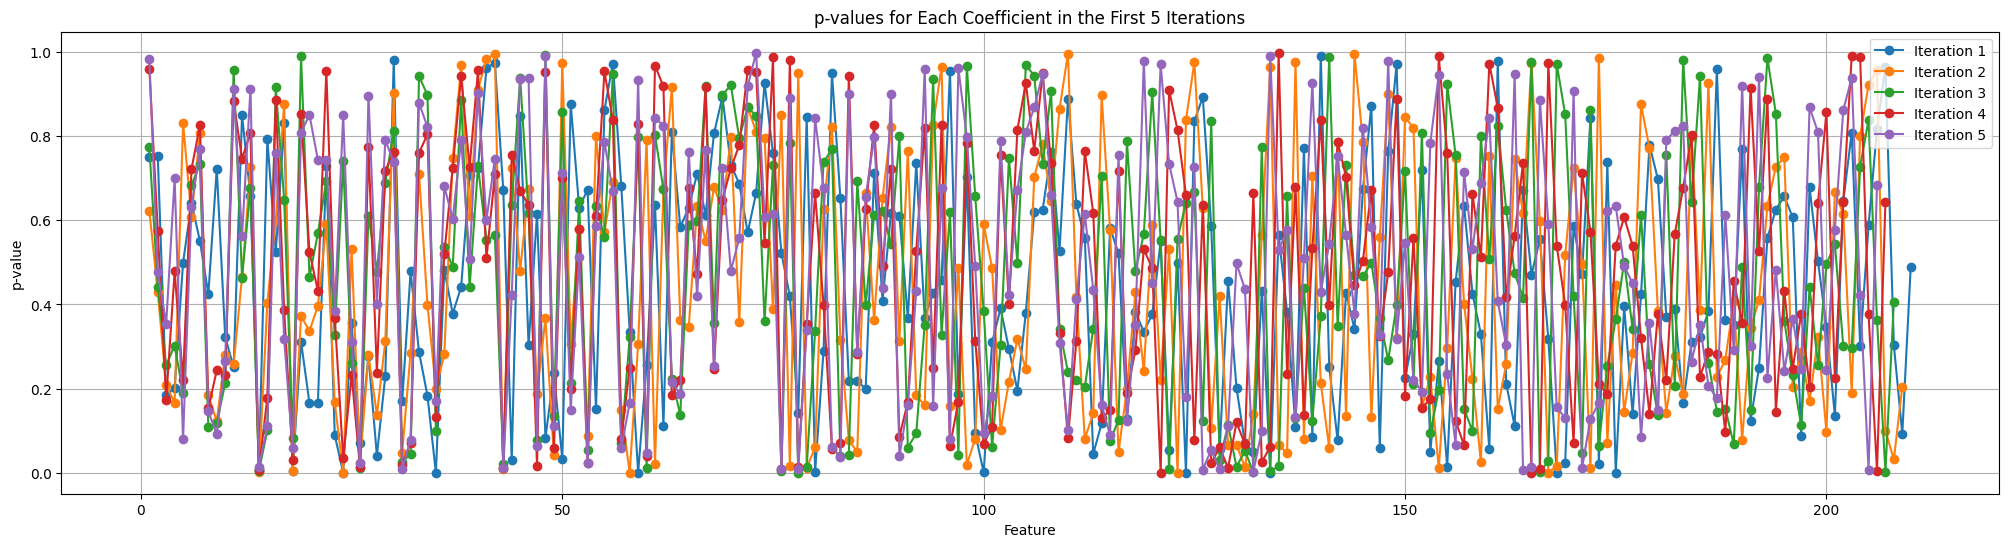

In [116]:
# plotting the p-values for the first 5 iterations
plt.figure(figsize=(25, 6))
for i, p_val in enumerate(p_values[:5]):
    plt.plot(range(1, len(p_val) + 1), p_val,
             marker='o', label=f'Iteration {i + 1}')
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.title('p-values for Each Coefficient in the First 5 Iterations')
plt.legend()
plt.grid(True)
plt.show()

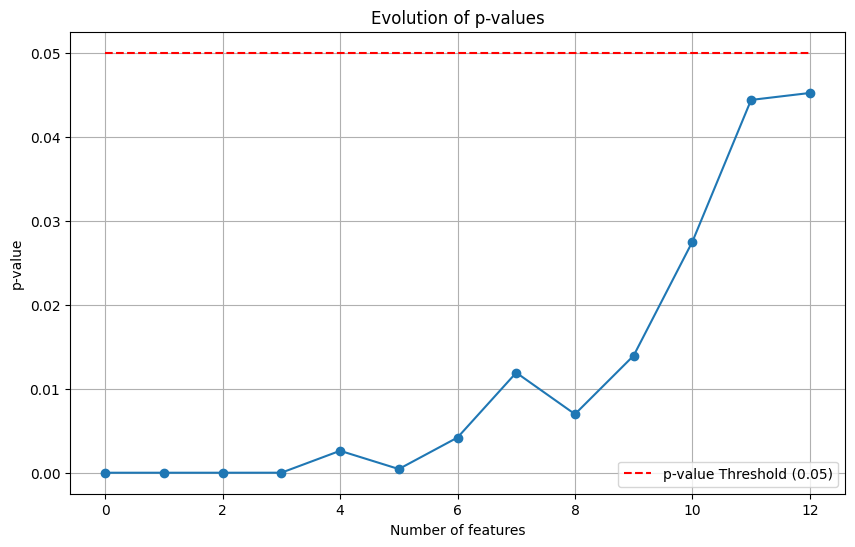

In [117]:

plt.figure(figsize=(10, 6))
plt.plot(best_p_values, marker='o')
plt.plot(range(len(best_p_values)), [0.05]*len(best_p_values),
         color='red', linestyle='--', label='p-value Threshold (0.05)')
plt.xlabel('Number of features')
plt.ylabel('p-value')
plt.title('Evolution of p-values')
plt.grid(True)
plt.legend()
plt.show()

In [118]:
train_r2_score = r2_score(y_train, model_fs.predict(
    X_train_scaled[:, selected_features]))
test_r2_score = r2_score(y_test, model_fs.predict(
    X_test_scaled[:, selected_features]))

print(f"Train R2 Score: {train_r2_score}")
print(f"Test R2 Score: {test_r2_score}")

Train R2 Score: 0.5919580687564019
Test R2 Score: 0.31321585946141883


### Comments about 3

- We can see that $R^2$ increased a lot in the test set but not that much in the train set. This makes sense because as we reduced the number of features, we also reduce overfitting.

- We can see that the p-values of the selected features are limited by the $0.05$ threshold.


# Extensions

Display two subplots at the end:

(a) The first subplot should show the evolution of the coefficients for each different value of the
penalty parameter.

(b) The second subplot should display the evolution of the R-squared coefficient at each of the 30
iterations

Since we are going to perform similar tasks for Lasso and Elastic Net, it is mandatory to write this
code as an independent function that can be parameterized for each specific case.


In [119]:

def plot_coefficients(model, penalty_values, X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize lists to store coefficients and R-squared values
    coefficients = []
    r2_scores = []

    # Iterate over the penalty parameter values
    for penalty in penalty_values:
        # Create and fit the Ridge regression model
        ridge_model = model(alpha=penalty, fit_intercept=False)
        ridge_model.fit(X_train_scaled, y_train)

        # Store the coefficients and R-squared value
        coefficients.append(ridge_model.coef_)
        r2_scores.append(r2_score(y_test, ridge_model.predict(X_test_scaled)))

    # Convert the coefficients list to a numpy array
    coefficients = np.array(coefficients)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the evolution of coefficients
    for i in range(coefficients.shape[1]):
        axs[0].plot(penalty_values, coefficients[:, i],
                    label=f'Coefficient {i+1}')
    axs[0].set_xscale('log')
    axs[0].set_xlabel('Penalty Parameter')
    axs[0].set_ylabel('Coefficient Value')
    axs[0].set_title(f'Evolution of Coefficients')

    # Plot the evolution of R-squared values
    axs[1].plot(penalty_values, r2_scores, marker='o')
    axs[1].set_xscale('log')
    axs[1].set_xlabel('Penalty Parameter')
    axs[1].set_ylabel('R-squared')
    axs[1].set_title('Evolution of R-squared for Test Set')

    fig.suptitle(str(model.__name__.split(".")[-1]))

    # Display the subplots
    plt.tight_layout()
    plt.show()

    opti_lambda, min_r2 = max(
        zip(penalty_values, r2_scores), key=lambda pair: pair[1])

    return opti_lambda

# Question 4

### Ridge

Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of
the penalty parameter, which should be on a logarithmic scale between $10^1-10^6$.

$$
\text{min}_{\theta} \left( \|Y - \theta^TX\|^2 + \lambda \|\theta\|^2 \right)


$$


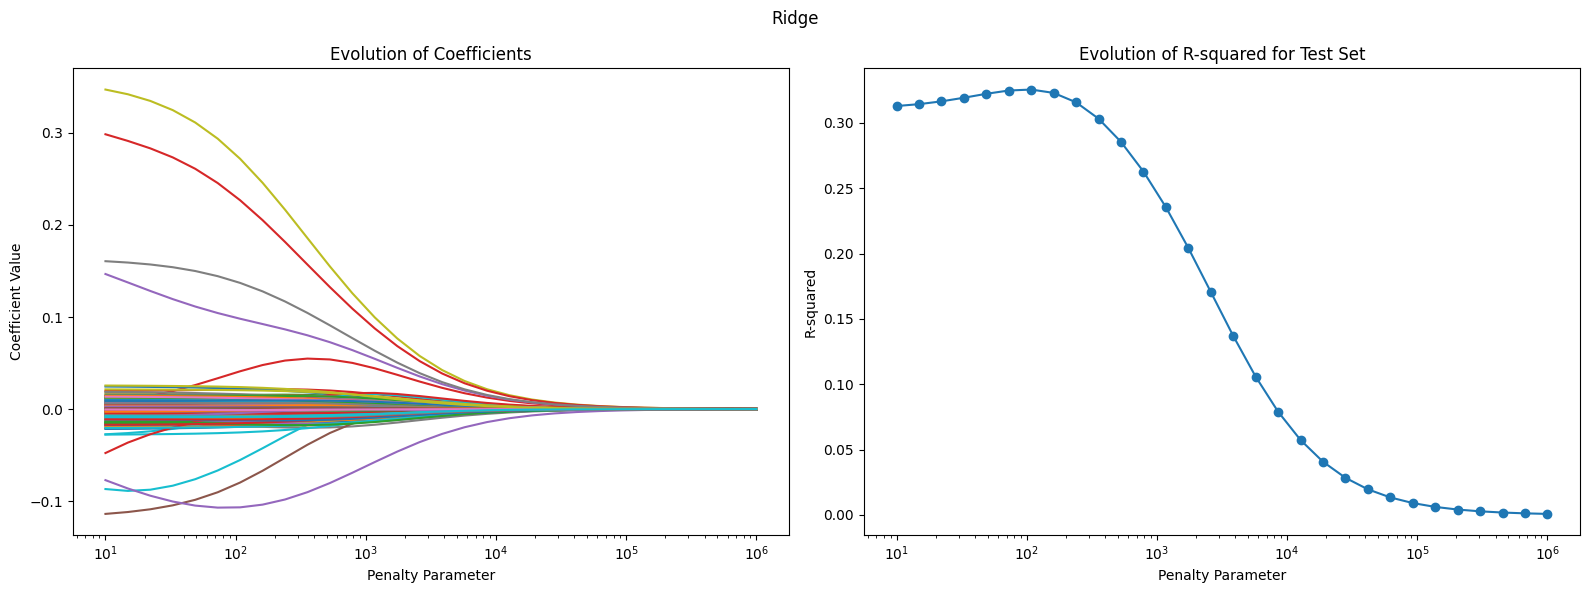

108.2636733874054

In [120]:
penalty_values = np.logspace(1, 6, num=30)
opti_lambda_ridge = plot_coefficients(
    Ridge, penalty_values, X_train_scaled, y_train, X_test_scaled, y_test)
opti_lambda_ridge

# Question 5

Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty
parameter, which should be on a logarithmic scale between $10^{-3}-10^2$.

### Lasso

$$

\text{min}_{\theta} \left( \|Y - \theta^TX\|^2 + \lambda \|\theta\|_1 \right)
$$


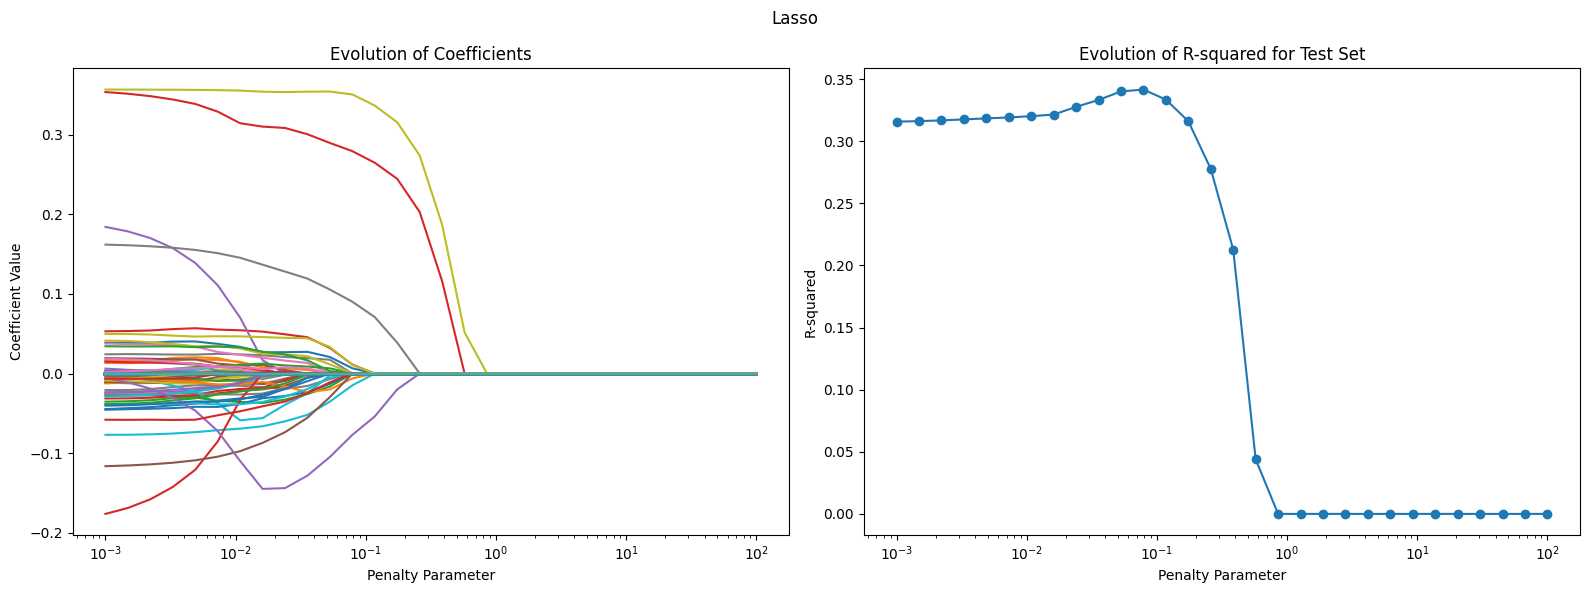

0.07880462815669913

In [121]:
penalty_values = np.logspace(-3, 2, num=30)
opti_lambda_lasso = plot_coefficients(
    Lasso, penalty_values, X_train_scaled, y_train, X_test_scaled, y_test)
opti_lambda_lasso

# Question 6

### ElasticNet

$$
\text{min}_{\theta} \left(\left\| y - X \theta \right\|_2^2 + \alpha  \lambda \left\| \theta \right\|_1 + 0.5 \alpha (1 - \lambda) \left\| \theta \right\|_2^2 \right)
$$

6. Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the
   penalty parameter, which should be on a logarithmic scale between $10^{-3}-10^2$


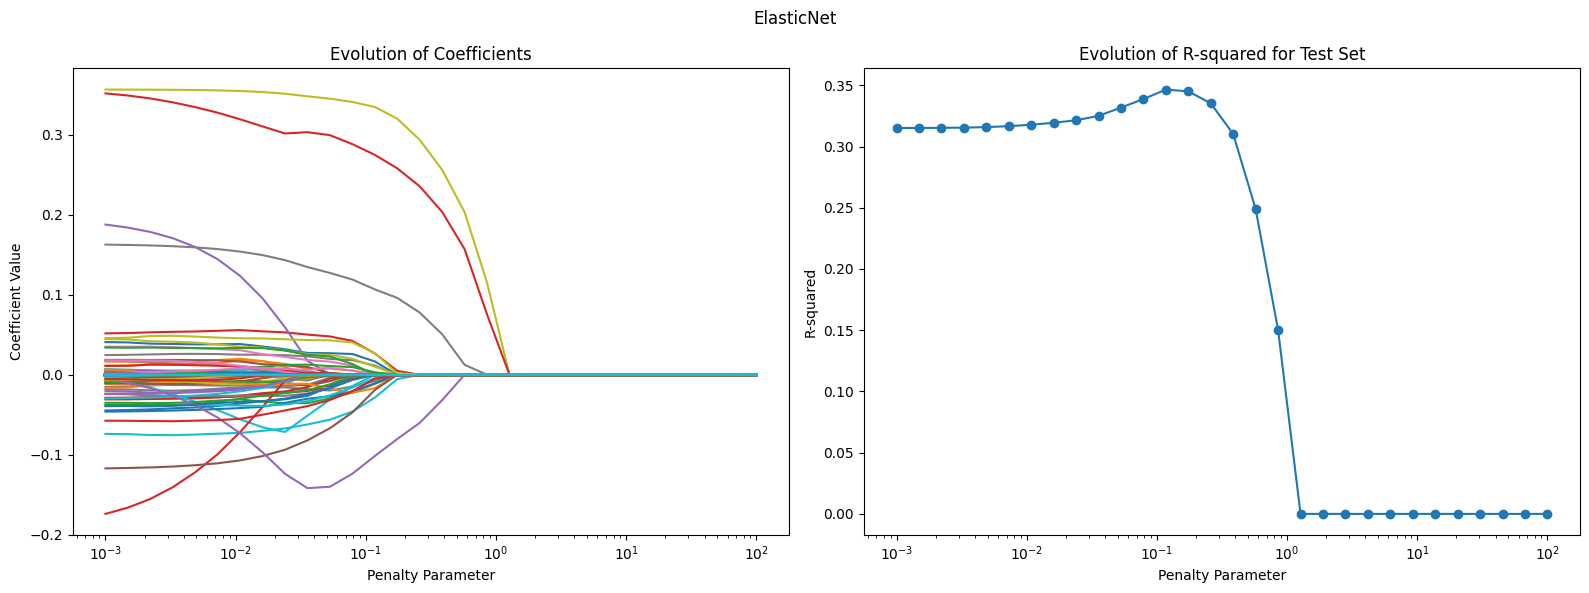

0.11721022975334805

In [122]:
penalty_values = np.logspace(-3, 2, num=30)
opti_lambda_elastic_net = plot_coefficients(
    ElasticNet, penalty_values, X_train_scaled, y_train, X_test_scaled, y_test)
opti_lambda_elastic_net

# PCR

7. Compute the singular value decomposition of the covariance matrix. For consistency in the notation
   use $U, s, V = SVD(X^T X)$


In [123]:
U, s, V = np.linalg.svd(X_train.T @ X_train)

(a) Plot a heatmap of the covariance matrix

We can compute the covariance matrix using: $$cov(X) = \frac{X^TX}{n-1}$$


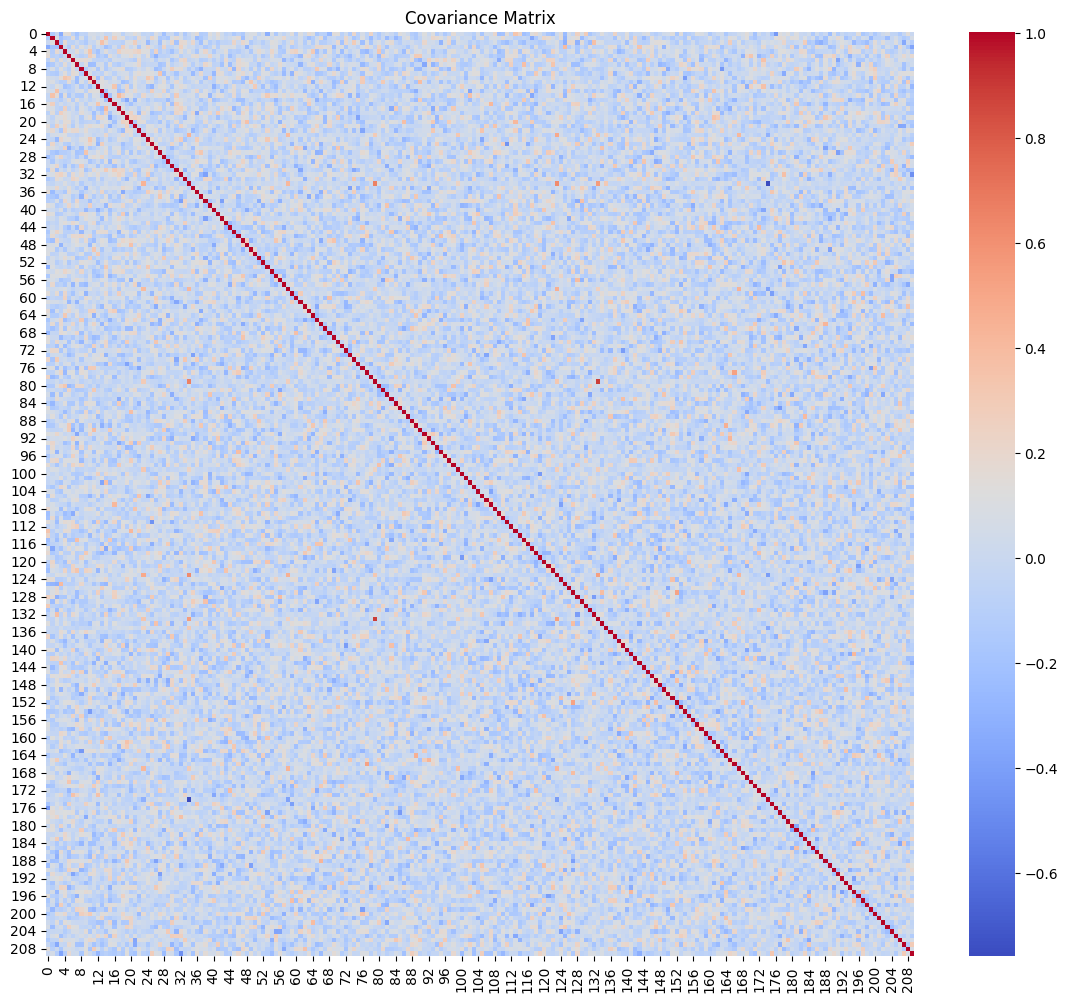

In [124]:
cov_mat = X_train_scaled.T@X_train_scaled/((X_train_scaled.shape[0]-1))

plt.figure(figsize=(14, 12))
sns.heatmap(cov_mat,  cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

(b) Compute the PCA for the data using the SVD.

To compute the PCA, we need to project the data on the base generate by its first k components, with greatest variance(greatest eigenvalues).


In [125]:
U, s, V = np.linalg.svd(cov_mat)

def my_PCA(X,  k):

    X_pca = X @ V.T[:, :k]
    s_k = s[:k]

    return X_pca, s_k

In [126]:
X_pca, s_k = my_PCA(X_train_scaled, len(s))

(c) Plot the amount of variance explained by the first k components for $k \in \{2...p\}. $ How many variables do we need to explain more than 90% of the variance?

After rewriting with lagrangian multipliers, the problem of finding the direction that maximizes the variance of the data, we can see that the variance is proportional to the eigenvalues($s \propto \lambda$)


Number of variables needed to explain more than 90% of the variance: 45


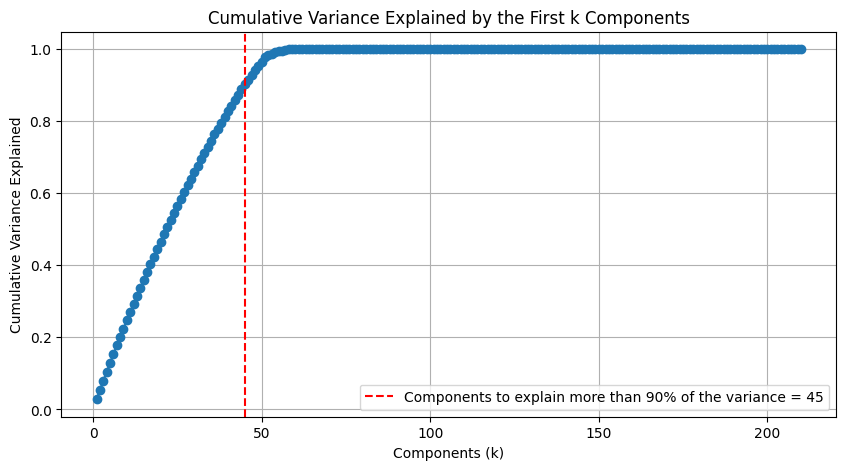

In [127]:
variance_explained = np.cumsum(s_k/np.sum(s_k))
num_components = np.where(variance_explained > 0.9)[0][0] + 1
print(
    f"Number of variables needed to explain more than 90% of the variance: {num_components}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(s) + 1), variance_explained, marker='o')
plt.axvline(x=num_components, color='red', linestyle='--',
            label=f'Components to explain more than 90% of the variance = {num_components}')
plt.title('Cumulative Variance Explained by the First k Components')
plt.xlabel('Components (k)')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.show()

(d) Plot the projected data with k = 2 using as color the value of y and interpret the plot.


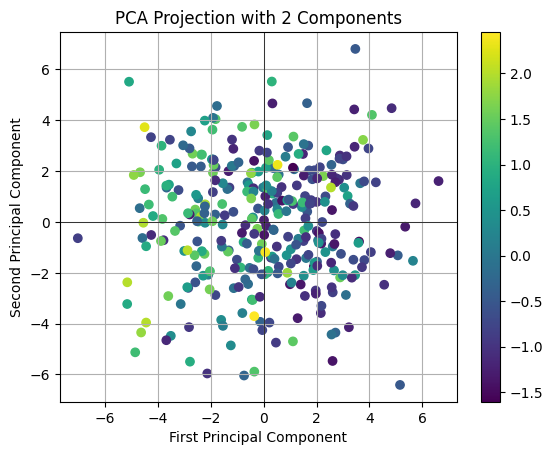

In [128]:

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')

plt.colorbar(scatter)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection with 2 Components')
plt.grid()
plt.show()

(e) Plot the the two first principal directions.

As expected the first two components of the PCA are orthogonal.


The components are orthogonal.


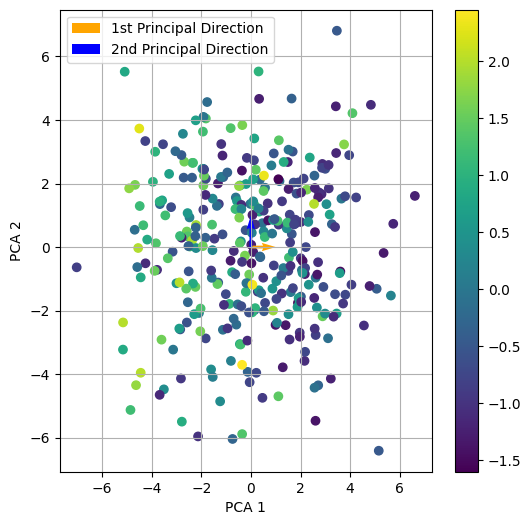

In [129]:
k = 2
k_eigenvectors = V.T[:, :k].reshape(-1, k)

dot_product = k_eigenvectors[:, 0]@k_eigenvectors[:, 1]
if np.isclose(dot_product, 0):
    print("The components are orthogonal.")


plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter)
# Plot the first principal direction
plt.quiver(0, 0, k_eigenvectors[:, 0].T @ k_eigenvectors[:, 0], k_eigenvectors[:, 0] @ k_eigenvectors[:, 1], angles='xy',
           scale_units='xy', scale=1, color='orange', label='1st Principal Direction')

# Plot the second principal direction
plt.quiver(0, 0, k_eigenvectors[:, 1].T @ k_eigenvectors[:, 0], k_eigenvectors[:, 1] @ k_eigenvectors[:, 1], angles='xy',
           scale_units='xy', scale=1, color='b', label='2nd Principal Direction')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()

(f) Run OLS on the projected data (PCR) using k components for k < 50. Select the k that
returns the best score of the OLS model and plot the evolution of the scores with k.


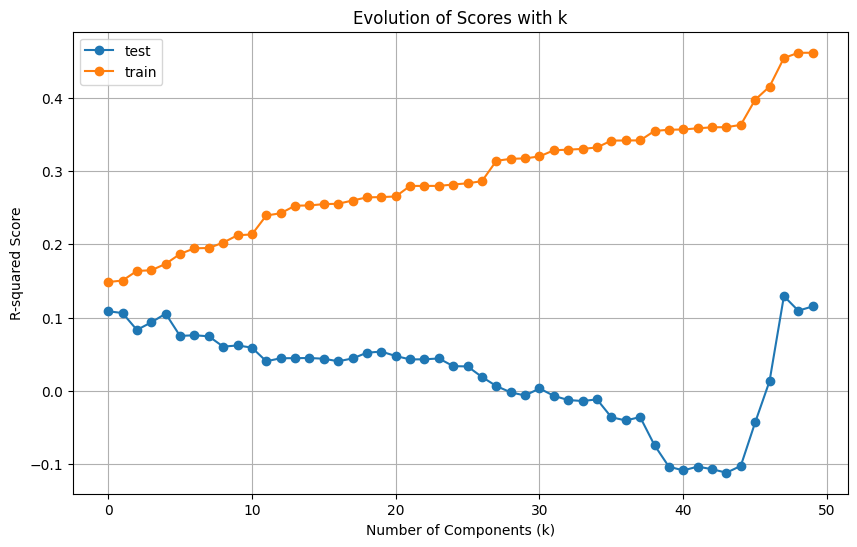

The best score is 0.1292 with k = 48


In [130]:
scores, scores_train = [], []
best_score = 0
best_k = 0

for k in range(1, 51):
    # Select the first k principal components
    # X_pcr,_ = my_PCA(X_train_scaled, k)
    X_pcr, _ = my_PCA(X_train_scaled, k)

    # Fit the OLS model
    ols_model = LinearRegression(fit_intercept=False)
    ols_model.fit(X_pcr, y_train)

    y_pred_train = ols_model.predict(X_pcr)

    X_test_pcr, _ = my_PCA(X_test_scaled, k)

    y_pred = ols_model.predict(X_test_pcr)

    # Calculate the R-squared score
    score = r2_score(y_test, y_pred)
    score_train = r2_score(y_train, y_pred_train)
    scores.append(score)
    scores_train.append(score_train)

    # Update the best score and k if necessary
    if score > best_score:
        best_score = score
        best_k = k

# Plot the evolution of the scores with k
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o', label='test')
plt.plot(scores_train, marker='o', label='train')
plt.legend()
plt.xlabel('Number of Components (k)')
plt.ylabel('R-squared Score')
plt.title('Evolution of Scores with k')
plt.grid()
plt.show()

print(f"The best score is {best_score:.4f} with k = {best_k}")

Comparison of the models

8. Summarize the results of the models and elaborate in their main characteristics. Plot all the training
   and testing errors for all the models considered and elaborate on the results.


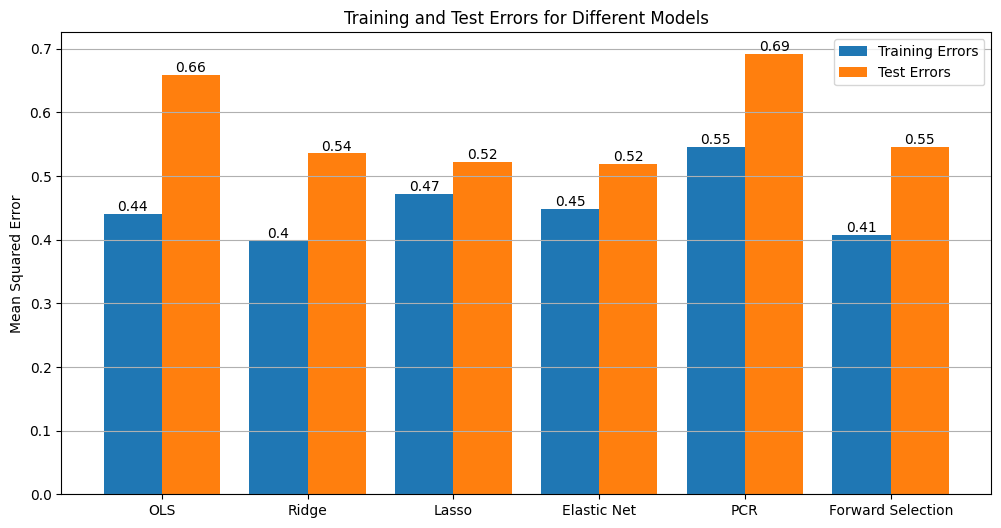

In [131]:

# Create the models
ols_model = LinearRegression(fit_intercept=False)
ridge_model = Ridge(alpha=opti_lambda_ridge, fit_intercept=False)
lasso_model = Lasso(alpha=opti_lambda_lasso, fit_intercept=False)
elasticnet_model = ElasticNet(
    alpha=opti_lambda_elastic_net, fit_intercept=False)

pcr = PCA(n_components=best_k)
pcr_ols = LinearRegression(fit_intercept=False)

models = ['OLS', 'Ridge', 'Lasso', 'Elastic Net', 'PCR', 'Forward Selection']

X_pcr, _ = my_PCA(X_train_scaled, k)


# Fit each model on the training data
ols_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elasticnet_model.fit(X_train_scaled, y_train)

X_pcr, _ = my_PCA(X_train_scaled, best_k)
ols_model_pcr = LinearRegression(fit_intercept=False)
ols_model_pcr.fit(X_pcr, y_train)

X_test_pcr, _ = my_PCA(X_test_scaled, best_k)
ols_model_pcr.predict(X_test_pcr)


# Compute the training and test errors for each model
train_errors = [mean_squared_error(y_train, ols_model.predict(X_train_scaled)),
                mean_squared_error(
                    y_train, ridge_model.predict(X_train_scaled)),
                mean_squared_error(
                    y_train, lasso_model.predict(X_train_scaled)),
                mean_squared_error(
                    y_train, elasticnet_model.predict(X_train_scaled)),
                mean_squared_error(y_train, ols_model_pcr.predict(X_pcr)),
                mean_squared_error(y_train, model_fs.predict(X_train_scaled[:, selected_features]))]

test_errors = [mean_squared_error(y_test, ols_model.predict(X_test_scaled)),
               mean_squared_error(y_test, ridge_model.predict(X_test_scaled)),
               mean_squared_error(y_test, lasso_model.predict(X_test_scaled)),
               mean_squared_error(
                   y_test, elasticnet_model.predict(X_test_scaled)),
               mean_squared_error(y_test, ols_model_pcr.predict(X_test_pcr)),
               mean_squared_error(y_test, model_fs.predict(X_test_scaled[:, selected_features]))]


fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training errors
ax.bar(np.arange(len(models))-0.2, train_errors,
       width=0.4, label='Training Errors')
ax.bar(np.arange(len(models))+0.2, test_errors, width=0.4, label='Test Errors')
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Training and Test Errors for Different Models')

# Add labels to the bars
for i, v in enumerate(ax.patches):
    ax.text(v.get_x() + v.get_width() / 2, v.get_height(),
            str(round(v.get_height(), 2)), ha='center', va='bottom')

ax.legend()
ax.grid(axis="y")
plt.show()

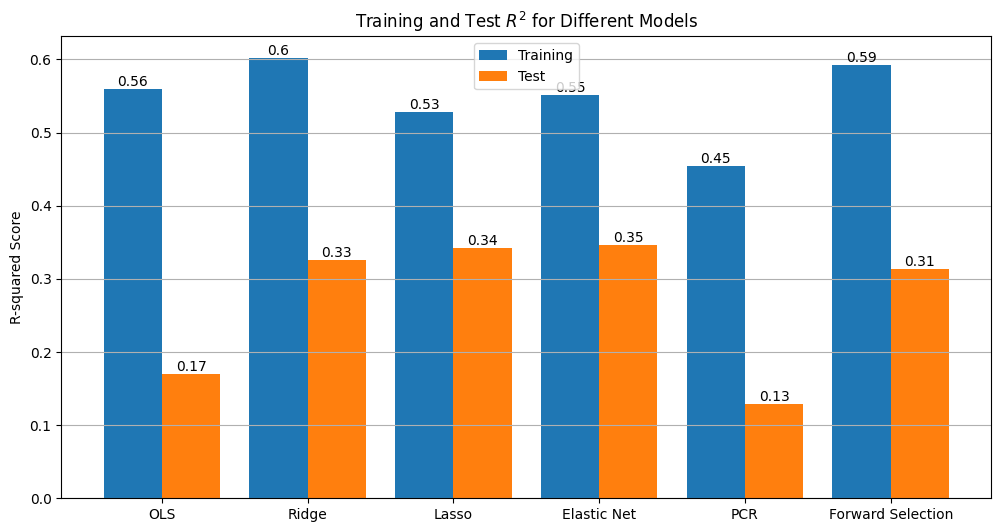

In [132]:
train_r2 = [r2_score(y_train, ols_model.predict(X_train_scaled)),
            r2_score(y_train, ridge_model.predict(X_train_scaled)),
            r2_score(y_train, lasso_model.predict(X_train_scaled)),
            r2_score(y_train, elasticnet_model.predict(X_train_scaled)),
            r2_score(y_train, ols_model_pcr.predict(X_pcr)),
            r2_score(y_train, model_fs.predict(X_train_scaled[:, selected_features]))]

test_r2 = [r2_score(y_test, ols_model.predict(X_test_scaled)),
           r2_score(y_test, ridge_model.predict(X_test_scaled)),
           r2_score(y_test, lasso_model.predict(X_test_scaled)),
           r2_score(y_test, elasticnet_model.predict(X_test_scaled)),
           r2_score(y_test, ols_model_pcr.predict(X_test_pcr)),
           r2_score(y_test, model_fs.predict(X_test_scaled[:, selected_features]))]

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(np.arange(len(models))-0.2, train_r2, width=0.4, label='Training')

ax.bar(np.arange(len(models))+0.2, test_r2, width=0.4, label='Test')

ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.set_ylabel('R-squared Score')
ax.set_title('Training and Test $R^2$ for Different Models')

# Add labels to the bars
for i, v in enumerate(ax.patches):
    ax.text(v.get_x() + v.get_width() / 2, v.get_height(),
            str(round(v.get_height(), 2)), ha='center', va='bottom')


ax.legend()
ax.grid(axis="y")

plt.show()

In [133]:
data = {'Model': models, 'R2 train': train_r2, 'R2 test': test_r2,
        'MSE train': train_errors, 'MSE test': test_errors}

# Create the DataFrame
df = pd.DataFrame(data)
df

,Model,R2 train,R2 test,MSE train,MSE test
0,OLS,0.559140,0.169933,0.440860,0.658961
1,Ridge,0.601487,0.325585,0.398513,0.535394
2,Lasso,0.528420,0.341750,0.471580,0.522562
3,Elastic Net,0.551401,0.346566,0.448599,0.518738
4,PCR,0.454748,0.129247,0.545252,0.691260
5,Forward Selection,0.591958,0.313216,0.408042,0.545214


# Conclusions:

1. OLS: As said before, the R2 score on the training set is moderate, suggesting that the model explains a reasonable amount of variance. However, on the test set, the R2 score drops significantly, indicating poor generalization. The MSE on the test set is relatively high, confirming the bad generalization.
2. Ridge: The R2 score on the test set is higher, and the MSE is lower, suggesting better performance in terms of both explanatory power and prediction accuracy.
3. Lasso: Lasso regression has a similar training R2 to OLS but performs better on the test set, indicating improved generalization. It has almost the best $R^2$ in the test set.
4. Elastic Net: The R2 score on the test set is improved compared to OLS, and the MSE is lower, indicating better generalization and predictive performance. It has the best $R^2$ for test set.
5. PCR seems to have a lower R2 score and higher MSE on both the training and test sets compared to the other models.
6. Forward selection: It performs reasonably well, with a higher R2 score on both training and test sets compared to some other models. The MSE on the test set is relatively low, indicating good predictive performance.

In summary, Ridge, Lasso, and Elastic Net appear to outperform OLS in terms of generalization and predictive accuracy. PCR seems to have a weaker performance, while Forward Selection performs reasonably well.
